In [11]:
"""
Quantiles divide a dataset into equal-sized intervals. For example:

- Median (Q2): The 50th percentile (middle value).\n
- Quartiles (Q1, Q2, Q3): Divide data into 4 parts.\n
- Percentiles: Divide data into 100 parts.\n
- They help understand the distribution and spread of data.\n
---
"""

'\nQuantiles divide a dataset into equal-sized intervals. For example:\n\n- Median (Q2): The 50th percentile (middle value).\n\n- Quartiles (Q1, Q2, Q3): Divide data into 4 parts.\n\n- Percentiles: Divide data into 100 parts.\n\n- They help understand the distribution and spread of data.\n\n---\n'

[17.25 19.5  21.75]


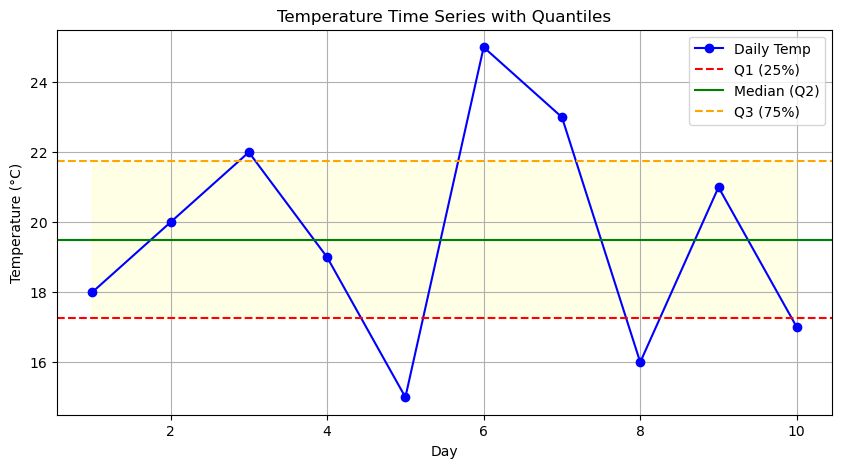

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
days = np.arange(1, 11)
temps = np.array([18, 20, 22, 19, 15, 25, 23, 16, 21, 17])

# Create DataFrame
df = pd.DataFrame({"Day": days, "Temperature": temps})

# Ensure columns are numeric (convert if needed)
df["Day"] = pd.to_numeric(df["Day"])
df["Temperature"] = pd.to_numeric(df["Temperature"])

# Calculate quantiles (explicitly convert to NumPy array)
quantiles = df["Temperature"].quantile([0.25, 0.5, 0.75]).to_numpy()

print(quantiles)

# Plot
plt.figure(figsize=(10, 5))

# Plot time series (ensure data is 1D)
plt.plot(
    df["Day"].values,  # <-- Explicitly use .values or .to_numpy()
    df["Temperature"].values, 
    "bo-", 
    label="Daily Temp"
)

# Add quantile lines
plt.axhline(y=quantiles[0], color="r", linestyle="--", label="Q1 (25%)")
plt.axhline(y=quantiles[1], color="g", linestyle="-", label="Median (Q2)")
plt.axhline(y=quantiles[2], color="orange", linestyle="--", label="Q3 (75%)")

# Shade interquartile range (IQR)
plt.fill_between(
    df["Day"].values,  # <-- Explicit conversion
    quantiles[0], 
    quantiles[2], 
    alpha=0.1, 
    color="yellow"
)

plt.title("Temperature Time Series with Quantiles")
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

In [13]:
"""
Tasks
1. Generate/Sample Time Series Data
Use the provided synthetic dataset or your own (stock prices, temperature, sales, etc.).

2. Compute and Plot Quantiles
Calculate quartiles (Q1, Q2, Q3) and the Interquartile Range (IQR).

Plot the time series with quantile lines.

Highlight the IQR region (between Q1 and Q3).

3. Detect Outliers
Identify outliers using the 1.5×IQR rule:

Lower Bound = Q1 – 1.5×IQR

Upper Bound = Q3 + 1.5×IQR

Mark outliers on the plot.

4. Compare Different Quantiles
Compute deciles (10%, 20%, ..., 90%) and plot them.

Compare with quartiles—does the distribution change?

5. Rolling Quantiles (Advanced)
Compute rolling median (Q2) and rolling IQR over a window (e.g., 7 days).

Plot rolling quantiles to see trends.
"""

'\nTasks\n1. Generate/Sample Time Series Data\nUse the provided synthetic dataset or your own (stock prices, temperature, sales, etc.).\n\n2. Compute and Plot Quantiles\nCalculate quartiles (Q1, Q2, Q3) and the Interquartile Range (IQR).\n\nPlot the time series with quantile lines.\n\nHighlight the IQR region (between Q1 and Q3).\n\n3. Detect Outliers\nIdentify outliers using the 1.5×IQR rule:\n\nLower Bound = Q1 – 1.5×IQR\n\nUpper Bound = Q3 + 1.5×IQR\n\nMark outliers on the plot.\n\n4. Compare Different Quantiles\nCompute deciles (10%, 20%, ..., 90%) and plot them.\n\nCompare with quartiles—does the distribution change?\n\n5. Rolling Quantiles (Advanced)\nCompute rolling median (Q2) and rolling IQR over a window (e.g., 7 days).\n\nPlot rolling quantiles to see trends.\n'

In [14]:
#Sample Time Series Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic temperature data (30 days)
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=30)
temperature = np.random.normal(loc=25, scale=5, size=30).round(1)  # Mean=25°C, Std=5

# Introduce an outlier
temperature[10] = 40  # Unusually hot day

# Create DataFrame
df = pd.DataFrame({"Date": dates, "Temperature": temperature})
print(df.tail())

         Date  Temperature
25 2023-01-26         25.6
26 2023-01-27         19.2
27 2023-01-28         26.9
28 2023-01-29         22.0
29 2023-01-30         23.5


In [15]:
print(df.head())

        Date  Temperature
0 2023-01-01         27.5
1 2023-01-02         24.3
2 2023-01-03         28.2
3 2023-01-04         32.6
4 2023-01-05         23.8


In [16]:
# Your solution to task 2
# Compute and Plot Quantiles

quantiles = df["Temperature"].quantile([0.25, 0.5, 0.75]).to_numpy()

In [17]:
print(quantiles[0])

22.05


In [18]:
IQR = quantiles[2] - quantiles[0]
print(IQR)

5.300000000000001


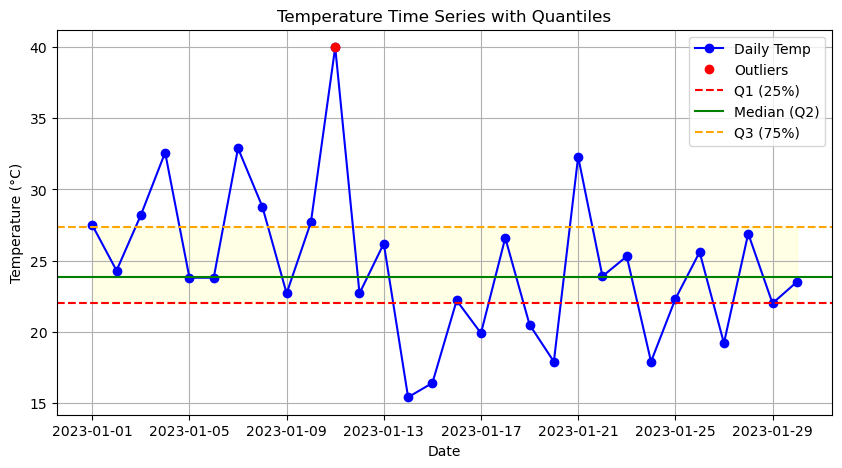

In [25]:
plt.figure(figsize=(10, 5))

# Plot time series (ensure data is 1D)
plt.plot(
    df["Date"].values,  # <-- Explicitly use .values or .to_numpy()
    df["Temperature"].values, 
    "bo-", 
    label="Daily Temp"
)

# this outliers plot is of Task 3
plt.plot(
    outliers["Date"].values,
    outliers["Temperature"].values,
    "ro",  # Red circles for outliers
    label="Outliers"
)
# Add quantile lines
plt.axhline(y=quantiles[0], color="r", linestyle="--", label="Q1 (25%)")
plt.axhline(y=quantiles[1], color="g", linestyle="-", label="Median (Q2)")
plt.axhline(y=quantiles[2], color="orange", linestyle="--", label="Q3 (75%)")

# Shade interquartile range (IQR)
plt.fill_between(
    df["Date"].values,  # <-- Explicit conversion
    quantiles[0], 
    quantiles[2], 
    alpha=0.1, 
    color="yellow"
)

plt.title("Temperature Time Series with Quantiles")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Your solution to task 3
# Detect Outliers
#The plot for outliers is above

lower_bound = quantiles[0] - 1.5*IQR

upper_bound = quantiles[2] + 1.5*IQR


print(lower_bound, upper_bound)

14.1 35.300000000000004


In [21]:
outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]
print(outliers)

         Date  Temperature
10 2023-01-11         40.0


[17.9  20.38 22.27 23.18 23.85 25.42 26.69 27.8  32.33]


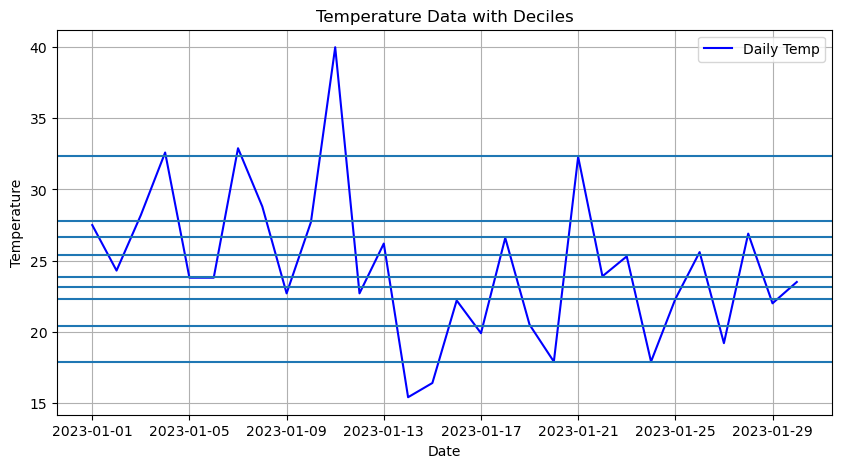

In [22]:
# Your solution to task 4
# Compare Different Quantiles

deciles = np.percentile(df["Temperature"], np.arange(10, 100, 10))

print( deciles)


plt.figure(figsize=(10, 5))
plt.plot(
    df["Date"].values, 
    df["Temperature"].values, 
    label="Daily Temp", 
    color='blue'
    )


for i in range(len(deciles)):
    plt.axhline(y=deciles[i])


plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Data with Deciles")
plt.legend()
plt.grid()
plt.show()


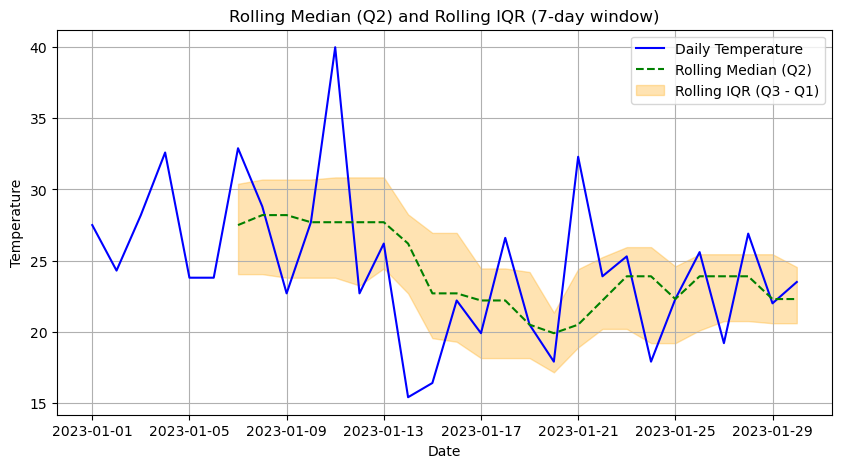

In [23]:
#Task 5

#Rolling Quantiles (Advanced)

rolling_median = df["Temperature"].rolling(window=7).median()
#print(rolling_median)


rolling_Q1 = df["Temperature"].rolling(window=7).quantile(0.25)
rolling_Q3 = df["Temperature"].rolling(window=7).quantile(0.75)

rolling_IQR = rolling_Q3 - rolling_Q1


plt.figure(figsize=(10, 5))

plt.plot(df['Date'], df["Temperature"], label="Daily Temperature", color="blue")

plt.plot(df['Date'], rolling_median, label="Rolling Median (Q2)", color="green", linestyle="--")

plt.fill_between(df['Date'], rolling_Q1, rolling_Q3, color='orange', alpha=0.3, label="Rolling IQR (Q3 - Q1)")

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Rolling Median (Q2) and Rolling IQR (7-day window)")
plt.legend()
plt.grid()
plt.show()



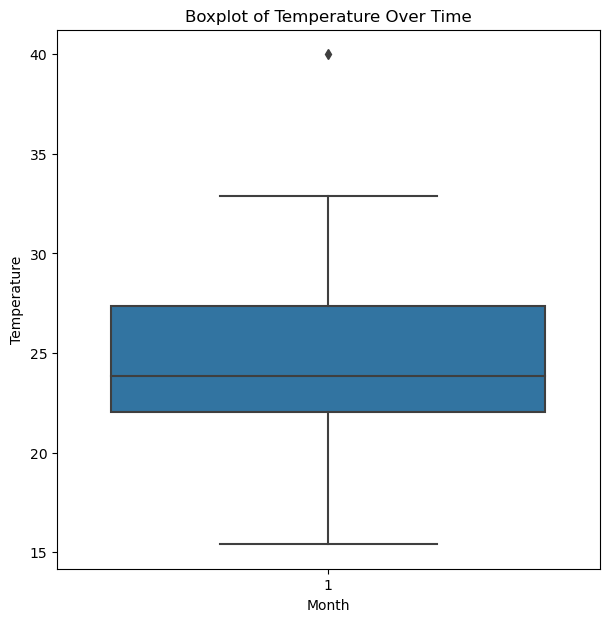

In [24]:
#Bonus Challenge
#Use Seaborn for a boxplot over time:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





plt.figure(figsize=(7, 7))
sns.boxplot(x=df['Date'].dt.month, y=df["Temperature"])

plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Boxplot of Temperature Over Time")
plt.show()
